In [44]:
import pandas as pd
import numpy as np
import rebound
import matplotlib.pyplot as plt
%matplotlib inline

def calcarrays(sim):
    ps = sim.particles
    m0 = ps[0].m
    m = np.array([p.m for p in ps[1:]])
    a = np.array([p.a for p in ps[1:]])
    
    abar = np.array([p.a for p in ps[1:]]).mean()
    ecross = np.array([ps[i+1].a-ps[i].a for i in range(1,sim.N-1)])/abar
    ehill = np.array([((ps[i].m+ps[i+1].m)/3./ps[0].m)**(1/3) for i in range(1,sim.N-1)])
    return m0, abar, m, a, ecross, ehill

sim = rebound.Simulation('kep23-000140.bin')
m0, abar, m, a, ecross, ehill = calcarrays(sim)

In [21]:
df5 = pd.read_csv('Kep23-SPOCK.csv', index_col=0)
sf5 = df[df['SPOCKstable']>0]
df05 = pd.read_csv('Kep23-T15.csv', index_col=0)

# SPOCK ergodic Prediction

Text(0.5, 0, 'e2')

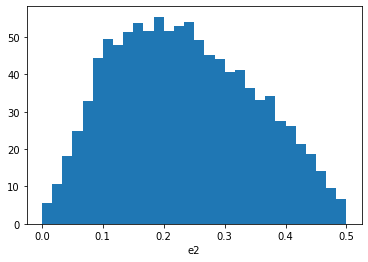

In [54]:
fig, ax = plt.subplots()
counts,bins,img = ax.hist(sf5['e2'], weights=sf5['SPOCKstable'], bins=30)
ax.set_xlabel('e2')

# Tremaine ergodic prediction

Text(0.5, 0, 'e2')

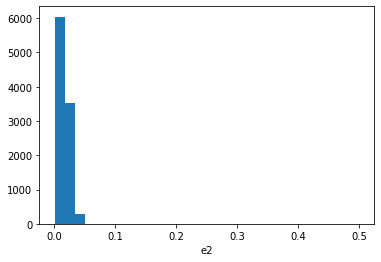

In [34]:
fig, ax = plt.subplots()
_,_,_=ax.hist(df05['e2'], weights=df05['T15stable'], bins=bins)
ax.set_xlabel('e2')

# Reason

In [45]:
emax1 = (a[1]-a[0]-9*ehill[0]*abar)/abar
emax2 = (a[2]-a[1]-9*ehill[1]*abar)/abar

Text(0.5, 0, 'e1+e2')

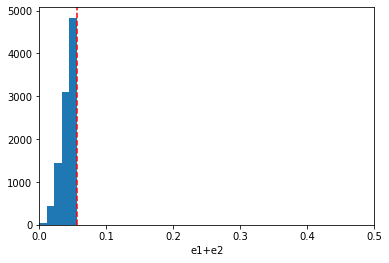

In [53]:
fig, ax = plt.subplots()
_,bins,_=ax.hist(df05['e1']+df05['e2'], weights=df05['T15stable'], bins=np.linspace(0,2*emax1,11))
ax.axvline(emax1, linestyle='--', c='r')
ax.set_xlim([0,0.5])
ax.set_xlabel('e1+e2')

Sampling uniformly in e^2 before any stability

Text(0.5, 0, 'e2')

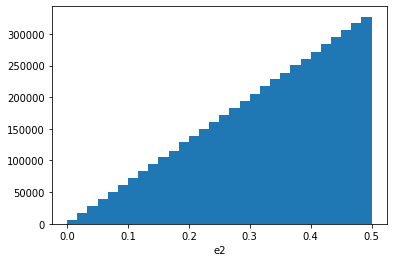

In [36]:
fig, ax = plt.subplots()
counts,bins,img = ax.hist(df5['e2'], bins=30)
ax.set_xlabel('e2')

# Correlation

e+ mode doesn't matter

Text(0, 0.5, 'e2')

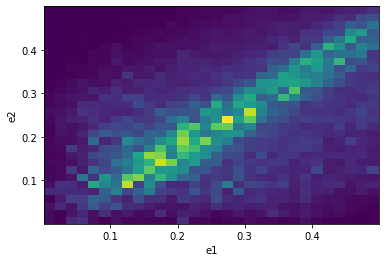

In [35]:
fig, ax = plt.subplots()
_,_,_,_ = ax.hist2d(sf5['e1'], sf5['e2'], weights=sf5['SPOCKstable'], bins=30)
ax.set_xlabel('e1')
ax.set_ylabel('e2')

Text(0.5, 0, 'e2')

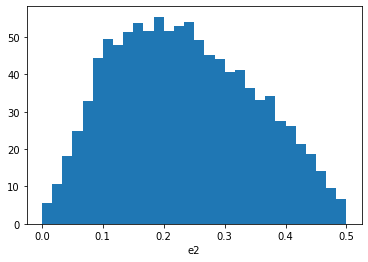

In [38]:
fig, ax = plt.subplots()
counts,bins,img = ax.hist(sf5['e2'], weights=sf5['SPOCKstable'], bins=30)
ax.set_xlabel('e2')

# SPOCK prediction

Text(0.5, 0, 'Z23')

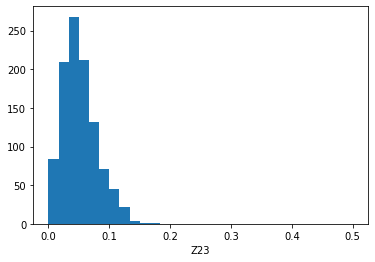

In [55]:
fig, ax = plt.subplots()
_,_,_=ax.hist(sf['Z23'], weights=sf['SPOCKstable'], bins=bins)
ax.set_xlabel('Z23')

# Tremaine prediction

Text(0.5, 0, 'Z23')

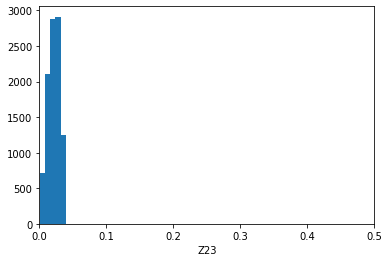

In [56]:
fig, ax = plt.subplots()
_,bins,_=ax.hist(df05['Z23'], weights=df05['T15stable'])
ax.set_xlim([0,0.5])
ax.set_xlabel('Z23')

Text(0, 0.5, 'Z23')

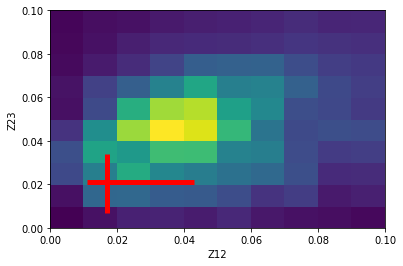

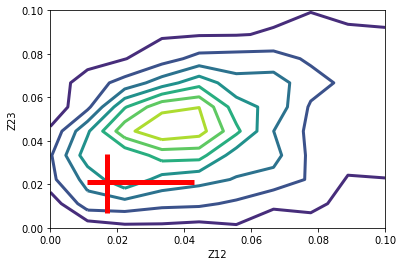

In [58]:
fig, ax = plt.subplots()
counts, xbins, ybins, img = ax.hist2d(sf5['Z12'], sf5['Z23'], weights=sf5['SPOCKstable'], range=([0,0.1], [0,0.1]))
ax.errorbar([0.017], [0.021], elinewidth=5, markersize=200, color='red', xerr=[[0.006], [0.026]], yerr=[[0.014], [0.013]]) 
ax.set_xlabel('Z12')
ax.set_ylabel('Z23')
fig, ax = plt.subplots()
ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
ax.errorbar([0.017], [0.021], elinewidth=5, markersize=200, color='red', xerr=[[0.006], [0.026]], yerr=[[0.014], [0.013]])
ax.set_xlabel('Z12')
ax.set_ylabel('Z23')